In [1]:
# https://marisara.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-openCV-8-%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8-%EB%AA%85%EC%84%B8%ED%99%94histogram-specification

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

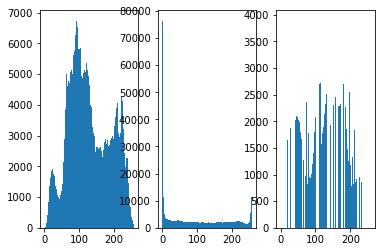

-1

In [7]:
img = cv2.imread('./lena.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
target = cv2.imread('./pepper.jpg')
target_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
shape = gray.shape
original = gray.ravel()
specified = target_gray.ravel()
s_values, bin_idx, s_counts = np.unique(original, return_inverse=True, return_counts=True)
t_values, t_counts = np.unique(specified, return_counts=True)
s_quantiles = np.cumsum(s_counts).astype(np.float64)
s_quantiles /= s_quantiles[-1]
sour = np.around(s_quantiles * 255)
t_quantiles = np.cumsum(t_counts).astype(np.float64)
t_quantiles /= t_quantiles[-1]
temp = np.around(t_quantiles * 255)

b = []
for data in sour:
    diff = temp - data
    mask = np.ma.less_equal(diff, -1)
    if np.all(mask):
        c = np.abs(diff).argmin()
        b.append(c)
    masked_diff = np.ma.masked_array(diff, mask)
    b.append(masked_diff.argmin())

LUT = np.array(b, dtype='uint8')
out = np.array(LUT[bin_idx].reshape(shape))
cv2.imshow('original', gray)
cv2.imshow('target', target_gray)
cv2.imshow('out', out)

plt.figure()
plt.subplot(1, 3, 1)
plt.hist(img.ravel(), 256, [0, 256])
plt.subplot(1, 3, 2)
plt.hist(target.ravel(), 256, [0, 256])
plt.subplot(1, 3, 3)
plt.hist(out.ravel(), 256, [0, 256])
plt.show()

cv2.waitKey(0)